## Problem Statement
find an imbalanced dataset (or generate a dataset) with fewer classes to apply oversampling or undersampling techniques (random over and undersampling, tomek link, smot and class weighing). Train the model on balanced dataset and find the performances metrics (accuracy, F1 score and AUC) and compare which technique is improving model performance. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

df = pd.read_csv('weatherAUS.csv')
df = df.dropna()

In [2]:
# Drop rows with missing target values
df = df.dropna(subset=['RainTomorrow'])

# Convert the target variable to binary
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select features and target variable
X = df.drop(["Date", "RainTomorrow"], axis=1)
# X = df.drop(["Date", "Evaporation", "Sunshine", "WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm", "RainToday", "RainTomorrow", "Location"], axis=1)
y = df['RainToday']
# Get dummies on location
X = pd.get_dummies(X, columns=['Location'], drop_first=True)
X = pd.get_dummies(X, columns=['WindGustDir'], drop_first=True)
X = pd.get_dummies(X, columns=['WindDir3pm'], drop_first=True)
X = pd.get_dummies(X, columns=['WindDir9am'], drop_first=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

baseline_acc = accuracy_score(y_test, y_pred)
baseline_f1 = f1_score(y_test, y_pred)
baseline_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])


c:\Users\varun\Desktop\DAI-101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[12967   181]
 [  203 13024]]


c:\Users\varun\Desktop\DAI-101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


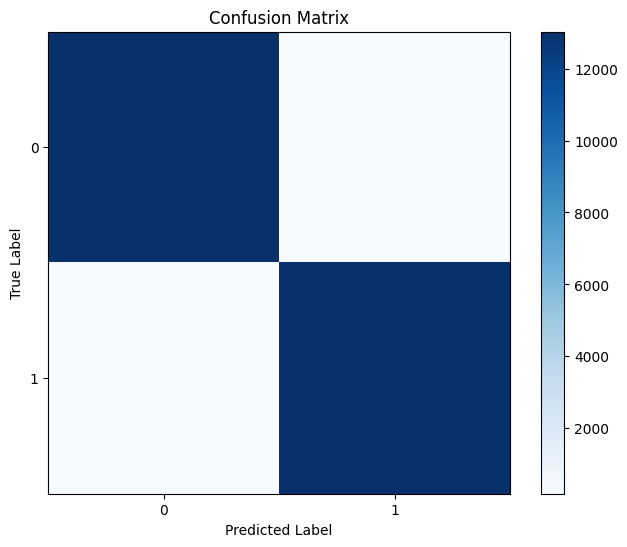

In [11]:

# 2. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_ros = lr.predict(X_test_res)

ros_acc = accuracy_score(y_test_res, y_pred_ros)
ros_f1 = f1_score(y_test_res, y_pred_ros)
ros_auc = roc_auc_score(y_test_res, lr.predict_proba(X_test_res)[:, 1])
conf_mat = confusion_matrix(y_test_res, y_pred_ros)
print(conf_mat)
# confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()


In [6]:

# 2. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = ros.fit_resample(X, y)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)
lr.fit(X_rus, y_rus)
y_pred_rus = lr.predict(X_test_rus)

rus_acc = accuracy_score(y_test_rus, y_pred_rus)
rus_f1 = f1_score(y_test_rus, y_pred_rus)
rus_auc = roc_auc_score(y_test_rus, lr.predict_proba(X_test_rus)[:, 1])


c:\Users\varun\Desktop\DAI-101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# 3. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = ros.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
lr.fit(X_smote, y_smote)
y_pred_smote = lr.predict(X_test_smote)

smote_acc = accuracy_score(y_test_smote, y_pred_smote)
smote_f1 = f1_score(y_test_smote, y_pred_smote)
smote_auc = roc_auc_score(y_test_smote, lr.predict_proba(X_test_smote)[:, 1])

c:\Users\varun\Desktop\DAI-101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:

# 4. Tomek Links
tl = TomekLinks()
X_tl, y_tl = ros.fit_resample(X, y)
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=42)
lr.fit(X_tl, y_tl)
y_pred_tl = lr.predict(X_test_tl)

tl_acc = accuracy_score(y_test_tl, y_pred_tl)
tl_f1 = f1_score(y_test_tl, y_pred_tl)
tl_auc = roc_auc_score(y_test_tl, lr.predict_proba(X_test_tl)[:, 1])


c:\Users\varun\Desktop\DAI-101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:

# 5. Class Weighing
lr_weighted = LogisticRegression(class_weight='balanced')
lr_weighted.fit(X_train, y_train)
y_pred_weighted = lr_weighted.predict(X_test)

weighted_acc = accuracy_score(y_test, y_pred_weighted)
weighted_f1 = f1_score(y_test, y_pred_weighted)
weighted_auc = roc_auc_score(y_test, lr_weighted.predict_proba(X_test)[:, 1])


c:\Users\varun\Desktop\DAI-101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Print performance metrics
print(f"Baseline: Accuracy={baseline_acc}, F1={baseline_f1}, AUC={baseline_auc}")
print(f"Random Oversampling: Accuracy={ros_acc}, F1={ros_f1}, AUC={ros_auc}")
print(f"Random Undersampling: Accuracy={rus_acc}, F1={rus_f1}, AUC={rus_auc}")
print(f"SMOTE: Accuracy={smote_acc}, F1={smote_f1}, AUC={smote_auc}")
print(f"Tomek Links: Accuracy={tl_acc}, F1={tl_f1}, AUC={tl_auc}")
print(f"Class Weighing: Accuracy={weighted_acc}, F1={weighted_f1}, AUC={weighted_auc}")

Baseline: Accuracy=0.9940919295758005, F1=0.9866915091828586, AUC=0.999749788903289
Random Oversampling: Accuracy=0.9854407582938388, F1=0.9854721549636803, AUC=0.9988406898529616
Random Undersampling: Accuracy=0.9846824644549763, F1=0.9846969696969697, AUC=0.9989546232665808
SMOTE: Accuracy=0.9846824644549763, F1=0.9846969696969697, AUC=0.9989546232665808
Tomek Links: Accuracy=0.9846824644549763, F1=0.9846969696969697, AUC=0.9989546232665808
Class Weighing: Accuracy=0.9836937256292095, F1=0.9640625, AUC=0.9982965886610219


best model is baseline